In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.neighbors
import sklearn.model_selection
import pandas as pd
from sklearn import svm
%matplotlib inline

## Aufgabe 1

$x^1 = (3, 4)^T, y^1 = -1$

$x^2 = (2, 2)^T, y^2 = -1$

$x^3 = (4, 4)^T, y^3 = -1$

$x^4 = (1, 4)^T, y^4 = -1$

$x^5 = (2, 1)^T, y^5 = 1$

$x^6 = (4, 3)^T, y^6 = 1$

$x^7 = (4, 1)^T, y^7 = 1$

### 1) Zeichnen Sie die Trainingsdatenpunkte in ein Koordinatensystem ein. Verwenden sie schwarze, gefüllte Kreise für positiv klassifizierte Punkte und weiße, ungefüllte Kreise für negativ klassifizierte Punkte. Schreiben Sie neben jeden Punkt den Index `i`

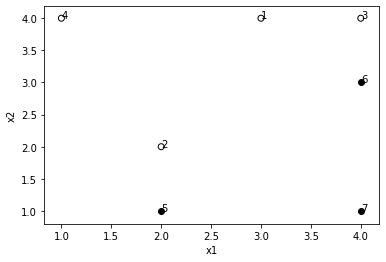

In [79]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
classes = [-1, -1, -1, -1, 1, 1, 1]
for i in range(len(x1)):
    if classes[i] == 1:
        plt.scatter(x1[i], x2[i], marker='o', c='black')
    else:
        plt.scatter(x1[i], x2[i], marker='o', facecolors='none', edgecolors='black')
    plt.annotate(str(i + 1), (x1[i], x2[i]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 2) Zeichnen Sie die optimale separierende Hyperebene ein und erstellen Sie eine Gleichung, die für alle Punkte gilt, die genau auf dieser Hyperebene liegen

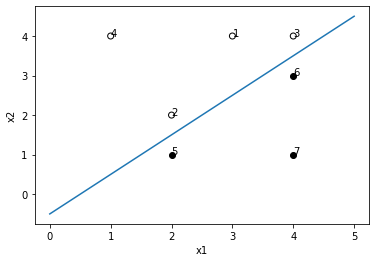

In [76]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
classes = [-1, -1, -1, -1, 1, 1, 1]
for i in range(len(x1)):
    if classes[i] == 1:
        plt.scatter(x1[i], x2[i], marker='o', c='black')
    else:
        plt.scatter(x1[i], x2[i], marker='o', facecolors='none', edgecolors='black')
    plt.annotate(str(i + 1), (x1[i], x2[i]))
plt.plot([0, 5], [-0.5, 4.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

$x_1 - x_2 - 0.5 = 0$

### 3) Geben sie eine mathematische Definition des Maximum Margin Klassifikators $f: R² \rightarrow \{-1, 1\}$ an, welcher die Trainingsdatenpunkte perfekt klassifiziert

$f(x) = sgn(x_1 - x_2 - 0.5)$ mit Entscheidungsgrenze $x_1 - x_2 - 0.5 = 0$

### 4) Zeichnen Sie im Koordinatensystem den maximalen Abstand (Margin) ein

In [ ]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
classes = [-1, -1, -1, -1, 1, 1, 1]
for i in range(len(x1)):
    if classes[i] == 1:
        plt.scatter(x1[i], x2[i], marker='o', c='black')
    else:
        plt.scatter(x1[i], x2[i], marker='o', facecolors='none', edgecolors='black')
    plt.annotate(str(i + 1), (x1[i], x2[i]))
plt.plot([0, 5], [-0.5, 4.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 5) Geben Sie alle Indizes der Datenpunkte an, welche Supportvektoren von $f$ darstellen

$x_2, x_3, x_5, x_6$

### 6) Zeichnen Sie einen neuen Datenpunkt $x^8$ in einer Klasse ihrer Wahl ein, sodass die Datenpunkte nicht mehr linear trennbar sind

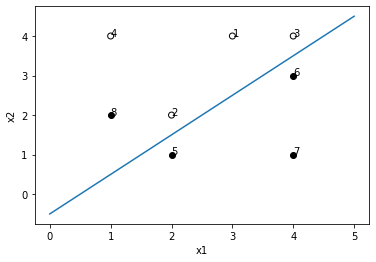

In [88]:
x1 = [3, 2, 4, 1, 2, 4, 4, 1]
x2 = [4, 2, 4, 4, 1, 3, 1, 2]
classes = [-1, -1, -1, -1, 1, 1, 1, 1]
for i in range(len(x1)):
    if classes[i] == 1:
        plt.scatter(x1[i], x2[i], marker='o', c='black')
    else:
        plt.scatter(x1[i], x2[i], marker='o', facecolors='none', edgecolors='black')
    plt.annotate(str(i + 1), (x1[i], x2[i]))
plt.plot([0, 5], [-0.5, 4.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Aufgabe 2

### 1) Laden Sie den Auto-Datensatz `Auto.csv` in einen DataFrame

In [52]:
df = pd.read_csv("Auto.csv")

### 2) Schauen Sie sich den kompletten Datensatz mit Hilfe von `print(df.to_string())` an. Was fällt Ihnen auf, wenn Sie sich das Feature `horsepower` genauer anschauen? Korrigieren Sie das Problem

In [53]:
for index, row in df.iterrows():
    print(row['horsepower'], index)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
130 0
165 1
150 2
150 3
140 4
198 5
220 6
215 7
225 8
190 9
170 10
160 11
150 12
225 13
95 14
95 15
97 16
85 17
88 18
46 19
87 20
90 21
95 22
113 23
90 24
215 25
200 26
210 27
193 28
88 29
90 30
95 31
? 32
100 33
105 34
100 35
88 36
100 37
165 38
175 39
153 40
150 41
180 42
170 43
175 44
110 45
72 46
100 47
88 48
86 49
90 50
70 51
76 52
65 53
69 54
60 55
70 56
95 57
80 58
54 59
90 60
86 61
165 62
175 63
150 64
153 65
150 66
208 67
155 68
160 69
190 70
97 71
150 72
130 73
140 74
150 75
112 76
76 77
87 78
69 79
86 80
92 81
97 82
80 83
88 84
175 85
150 86
145 87
137 88
150 89
198 90
150 91
158 92
150 93
215 94
225 95
175 96
105 97
100 98
100 99
88 100
95 101
46 102
150 103
167 104
170 105
180 106
100 107
88 108
72 109
94 110
90 111
85 112
107 113
90 114
145 115
230 116
49 117
75 118
91 119
112 120
150 121
110 122
122 123
180 124
95 125
?

In [54]:
df = df[df.horsepower != "?"]

### 3) Erstellen sie den Zielvektor `y` welcher den Werte 1 annehmen soll für alle Autos, deren Verbrauch über dem Median liegt und 0 falls nicht

In [55]:
med = df["mpg"].median()
df["y"] = np.where(df['mpg'] > med, 1, 0)

### 4) Erstellen Sie die Feature-Matrix `X` indem Sie aus dem DataFrame die Spalten `mpg` und `name` tilgen

In [56]:
X = df.copy()
del X["mpg"]
del X["name"]

### 5) Bei SVM müssen Sie für das Fitten den Hyperparameter `C` festlegen, welcher ebenso optimiert werden sollte. Wir machen das wie im letzten Übungsblatt mit einer Rastersuche auf dem Gitter $[0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]$.  Verwenden Sie einen linearen Kernel für die SVM und fitten Sie mit Hilfe 5-facher Kreuzvalidierung. Berechnen Sie dabei für jeden Wert von `C` den Mittelwert der Genauigkeit und plotten Sie am Ende die Genauigkeit über `C`. Verwenden Sie mit Hilfe von `matplotlib.pyplot.semilogx` eine logarithmische Skala für die X-Achse

In [80]:
def cross_val_and_plot(grid, kernel):
    vals = []
    for g in grid:
        model = sklearn.svm.SVC(C=g, kernel=kernel)
        vals.append(np.average(
            sklearn.model_selection.cross_val_score(model, X.iloc[:,:-1], X["y"], cv=5, scoring='accuracy')
        ))
    
    plt.semilogx(grid, vals)
    plt.xlabel("Accuracy")
    plt.ylabel("C")
    plt.show()
    
    return vals

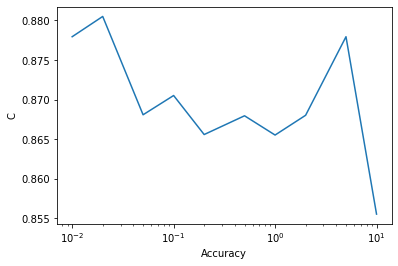

In [81]:
grid = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
vals = cross_val_and_plot(grid, 'linear')

### 6) Für welches Modell entscheiden Sie sich und warum?

In [85]:
print("Maximale Genauigkeit", np.array(vals).max(), "für C =", grid[np.argmax(vals)])

Maximale Genauigkeit 0.8805128205128204 für C = 0.02


### 7) Wiederholen Sie das Training mit polynomialen Kernel zweiten Grades auf dem Raster $[0.01, 0.05, 0.1, 0.2, 0.5, 1.0]$. Was fällt Ihnen auf?

In [ ]:
grid=[0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
vals = []
for g in grid:
    model = sklearn.svm.SVC(C=g, kernel="poly", degree=2)
    vals.append(np.average(
        sklearn.model_selection.cross_val_score(model, X.iloc[:,:-1], X["y"], cv=5, scoring='accuracy')
    ))

plt.semilogx(grid, vals)
plt.xlabel("Accuracy")
plt.ylabel("C")
plt.show()

/usr/lib/python3.8/site-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
/usr/lib/python3.8/site-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
/usr/lib/python3.8/site-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
/usr/lib/python3.8/site-packages/sklearn/svm/base.py:18

Was fällt auf:

### 8) Wiederholen Sie das Training mit radialem Basis-Kernel auf dem Raster $[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]$ und spielen Sie mit dem Hyperparameter $\gamma$. Können Sie ein besseres Modell als vorher finden?

In [ ]:
grid = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
gamma = [0.01, 0.3, 1.0]
for gam in gamma:
    vals = []
    for g in grid:
        model = sklearn.svm.SVC(C=g, kernel="rbf", gamma=gam)
        vals.append(np.average(
            sklearn.model_selection.cross_val_score(model, X.iloc[:,:-1], X["y"], cv=5, scoring='accuracy')
        ))

    plt.semilogx(grid, vals)
    plt.xlabel("Accuracy")
    plt.ylabel("C")
    plt.show()